<a href="https://colab.research.google.com/github/Moe-Arkar-Zaw/pytorch-bootcamp/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
torch.manual_seed(41)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
#Change Column String to Integer
df['species'] = df['species'].replace('setosa', 0.0)
df['species'] = df['species'].replace('virginica', 1.0)
df['species'] = df['species'].replace('versicolor', 2.0)

/tmp/ipython-input-4204164384.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('versicolor', 2.0)


In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


In [8]:
x = df.drop('species', axis=1)
y = df['species']

In [9]:
x = x.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [12]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [13]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
y_train

tensor([2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0,
        0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1,
        0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2,
        1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
        0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1])

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.item())

  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1397022008895874
Epoch: 10 Loss: 1.0544100999832153
Epoch: 20 Loss: 0.9166715741157532
Epoch: 30 Loss: 0.6260551810264587
Epoch: 40 Loss: 0.3987550735473633
Epoch: 50 Loss: 0.24901507794857025
Epoch: 60 Loss: 0.13584764301776886
Epoch: 70 Loss: 0.07556892931461334
Epoch: 80 Loss: 0.05038198083639145
Epoch: 90 Loss: 0.038889769464731216


Text(0.5, 0, 'epoch')

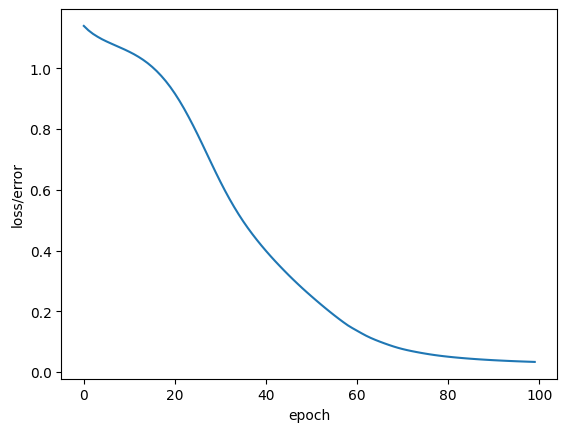

In [17]:
#Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [18]:
#Validate model on test set
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)

In [19]:
loss

tensor(0.1286)

In [20]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    print(f'{i+1}, \t {str(y_val)}, \t {y_test[i]}, \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'Correctness: {correct}')

1, 	 tensor([-6.9815,  5.7408,  2.8455]), 	 1, 	 1
2, 	 tensor([-10.1079,   9.1258,   1.3065]), 	 1, 	 1
3, 	 tensor([-10.9584,   9.6312,   2.1591]), 	 1, 	 1
4, 	 tensor([-2.8685,  1.0380,  5.6331]), 	 2, 	 2
5, 	 tensor([-8.7846,  7.4753,  2.6232]), 	 1, 	 1
6, 	 tensor([-0.5798, -1.5149,  7.0015]), 	 2, 	 2
7, 	 tensor([-6.4517,  4.9981,  3.6209]), 	 1, 	 1
8, 	 tensor([-2.5549,  0.6965,  5.7920]), 	 2, 	 2
9, 	 tensor([-7.5313,  6.1537,  3.1311]), 	 1, 	 1
10, 	 tensor([-10.7096,   9.6681,   1.3449]), 	 1, 	 1
11, 	 tensor([-5.9053,  4.4576,  3.7346]), 	 1, 	 1
12, 	 tensor([ 13.1833, -14.0755,   5.5305]), 	 0, 	 0
13, 	 tensor([ 12.0059, -12.7652,   4.9037]), 	 0, 	 0
14, 	 tensor([ 1.2265, -3.0406,  6.3975]), 	 2, 	 2
15, 	 tensor([ 11.4834, -12.5821,   5.9413]), 	 0, 	 0
16, 	 tensor([-5.4799,  3.9468,  4.1003]), 	 1, 	 2
17, 	 tensor([ 11.9423, -12.8441,   5.3712]), 	 0, 	 0
18, 	 tensor([-6.5523,  5.2595,  3.1084]), 	 2, 	 1
19, 	 tensor([ 12.6839, -13.5421,   5.3429]), 	 0, 	

In [21]:
new_iris = torch.tensor([1.2, 3.4, 1.4, 0.1])

In [22]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 7.2931, -7.3585,  1.9349])


In [23]:
newer_iris = torch.tensor([1.3, 0.3, 1.4, 0.5])

In [24]:
with torch.no_grad():
  print(model(newer_iris))

tensor([ 0.8760, -1.5265,  2.7349])


In [25]:
#Save our NN model
torch.save(model.state_dict(), 'my_first_pytorch_model')

In [26]:
#load our NN model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_pytorch_model'))

<All keys matched successfully>

In [27]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)